In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [2]:
#df = pd.read_csv('Hazardous_driving_areas.csv')

In [3]:
#df

In [4]:
#df.shape

In [5]:
#df.isnull().sum()

In [6]:
#df = df.drop('ISO_3166_2', axis=1)

In [7]:
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="geoapiExercises")
# def get_location_info(lat, long):
#     location = geolocator.reverse(f"{lat}, {long}", exactly_one=True)
#     address = location.raw['address']
#     return address
# lat = 51.627


# long = -0.125


# address = get_location_info(lat, long)
# city = address.get('city', '')
# county =address.get('county','')
# state = address.get('state', '')
# country = address.get('country', '')
# print(city,county,state,country)

In [8]:
# for index, row in df.iterrows():
#     if(row.isnull().any()):
#         address = get_location_info(row['Latitude'], row['Longitude'])

#         for column_name, value in row.items():
#             if pd.isnull(value):
#                 address1=address.get(column_name.lower(), '')
#                 if(address1!=''):
#                     df[column_name][index]=address1
#     print(index)

In [9]:
#df.isnull().sum()

In [10]:
#df.to_csv('Hazardous_driving_areas_converted.csv',index=False)

In [11]:
df = pd.read_csv('Hazardous_driving_areas_converted.csv')
df

,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,City,County,State,Country,SeverityScore,IncidentsTotal,UpdateDate,Version
0,c28qvs9,"POLYGON((-123.155364990234 49.0237426757812, -...",49.024,-123.155,49.025,-123.154,POINT(-123.15458 49.02429),49.024,-123.155,Delta,Metro Vancouver Regional District,British Columbia,Canada,0.009,3,02-10-2020,5.1
1,d9uhxu6,"POLYGON((-61.5316772460938 10.6581115722656, -...",10.658,-61.532,10.659,-61.530,POINT(-61.53142 10.65856),10.659,-61.531,Port of Spain,NaN,NaN,Trinidad and Tobago,0.058,7,02-10-2020,5.1
2,6px5wjb,"POLYGON((-79.892578125 -2.16567993164062, -79....",-2.166,-79.893,-2.164,-79.891,POINT(-79.89216 -2.16474),-2.165,-79.892,Guayaquil,Guayaquil,Guayas,Ecuador,0.006,3,02-10-2020,5.1
3,c28qvsf,"POLYGON((-123.153991699219 49.0251159667969, -...",49.025,-123.154,49.026,-123.153,POINT(-123.15385 49.02591),49.026,-123.154,Delta,Metro Vancouver Regional District,British Columbia,Canada,0.025,4,02-10-2020,5.1
4,6px5y0k,"POLYGON((-79.8870849609375 -2.15194702148438, ...",-2.152,-79.887,-2.151,-79.886,POINT(-79.88607 -2.15113),-2.151,-79.886,Guayaquil,Guayaquil,Guayas,Ecuador,0.046,3,02-10-2020,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10934,d58r0ht,"POLYGON((-89.6415710449219 20.9426879882812, -...",20.943,-89.642,20.944,-89.640,POINT(-89.64076 20.94355),20.944,-89.641,Mérida,Mérida,Yucatán,Mexico,0.045,3,02-10-2020,5.1
10935,9snfwsn,"POLYGON((-102.713928222656 22.96142578125, -10...",22.961,-102.714,22.963,-102.713,POINT(-102.71302 22.96208),22.962,-102.713,NaN,Calera,Zacatecas,Mexico,0.182,8,02-10-2020,5.1
10936,9sp18cq,"POLYGON((-102.615051269531 22.7705383300781, -...",22.771,-102.615,22.772,-102.614,POINT(-102.61472 22.77121),22.771,-102.615,Zacatecas,Zacatecas,Zacatecas,Mexico,0.022,3,02-10-2020,5.1
10937,9sp13qq,"POLYGON((-102.593078613281 22.7540588378906, -...",22.754,-102.593,22.755,-102.592,POINT(-102.59265 22.75419),22.754,-102.593,Zacatecas,Zacatecas,Zacatecas,Mexico,0.066,6,02-10-2020,5.1


In [12]:
df.shape

(10939, 17)

In [13]:
df.isnull().sum()

Geohash              0
GeohashBounds        0
Latitude_SW          0
Longitude_SW         0
Latitude_NE          0
Longitude_NE         0
Location             0
Latitude             0
Longitude            0
City              1566
County            1748
State              211
Country              0
SeverityScore        0
IncidentsTotal       0
UpdateDate           0
Version              0
dtype: int64

In [14]:
df = df.drop('City', axis=1)
df = df.drop('County', axis=1)
df = df[df['State'].notna()]

In [15]:
df.isnull().sum()

Geohash           0
GeohashBounds     0
Latitude_SW       0
Longitude_SW      0
Latitude_NE       0
Longitude_NE      0
Location          0
Latitude          0
Longitude         0
State             0
Country           0
SeverityScore     0
IncidentsTotal    0
UpdateDate        0
Version           0
dtype: int64

In [16]:
df.Country.unique()

array(['Canada', 'Ecuador', 'Australia', 'Chile', 'Spain',
       'United Kingdom of Great Britain and Northern Ireland (the)',
       'United Kingdom', 'Saint Lucia', 'Trinidad and Tobago',
       'South Africa', 'Zambia', 'United States of America (the)',
       'Colombia', 'Mexico'], dtype=object)

In [17]:
df.replace('United States of America (the)', 'USA',inplace=True)
df.replace('United Kingdom of Great Britain and Northern Ireland (the)', 'United Kingdom',inplace=True)

In [18]:
df.Country.unique()

array(['Canada', 'Ecuador', 'Australia', 'Chile', 'Spain',
       'United Kingdom', 'Saint Lucia', 'Trinidad and Tobago',
       'South Africa', 'Zambia', 'USA', 'Colombia', 'Mexico'],
      dtype=object)

In [19]:
sns.set(rc = {'figure.figsize':(16,11)},font_scale=1.1)

<AxesSubplot:xlabel='count', ylabel='Country'>

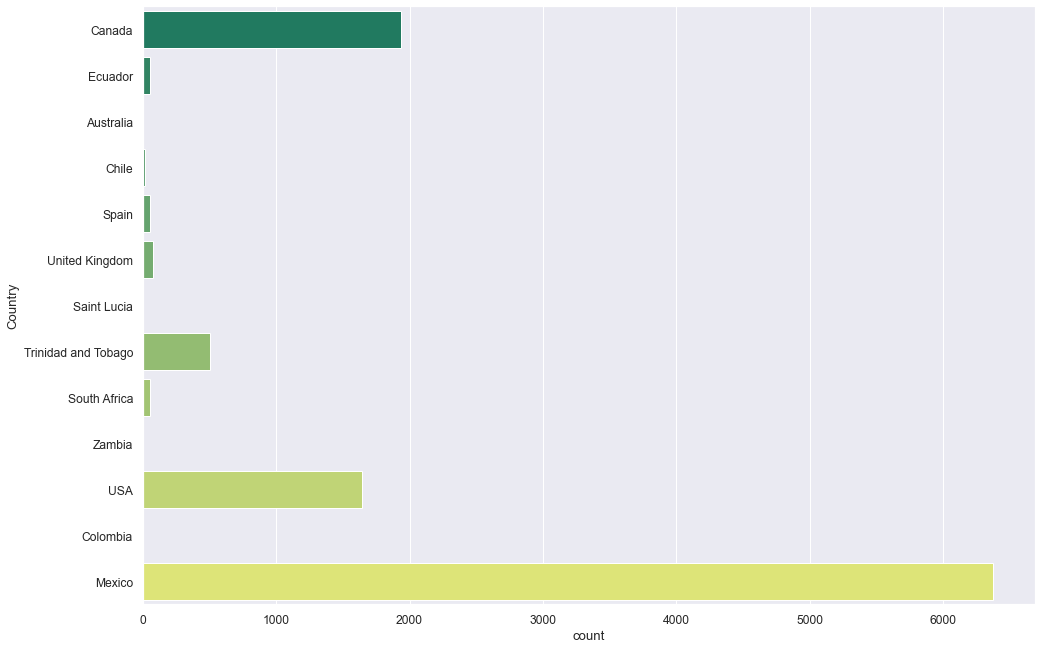

In [20]:
sns.countplot(y='Country',palette='summer',data=df)

<AxesSubplot:xlabel='count', ylabel='State'>

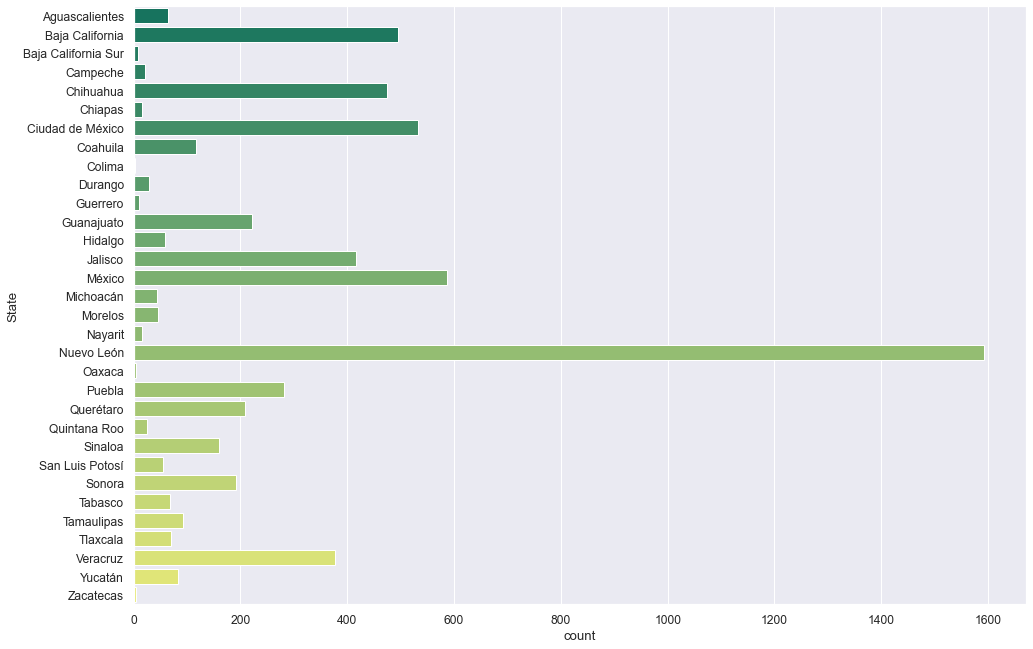

In [21]:
df_Mexico=df[df['Country']=='Mexico']
sns.countplot(y='State',palette='summer',data=df_Mexico)

<AxesSubplot:xlabel='count', ylabel='State'>

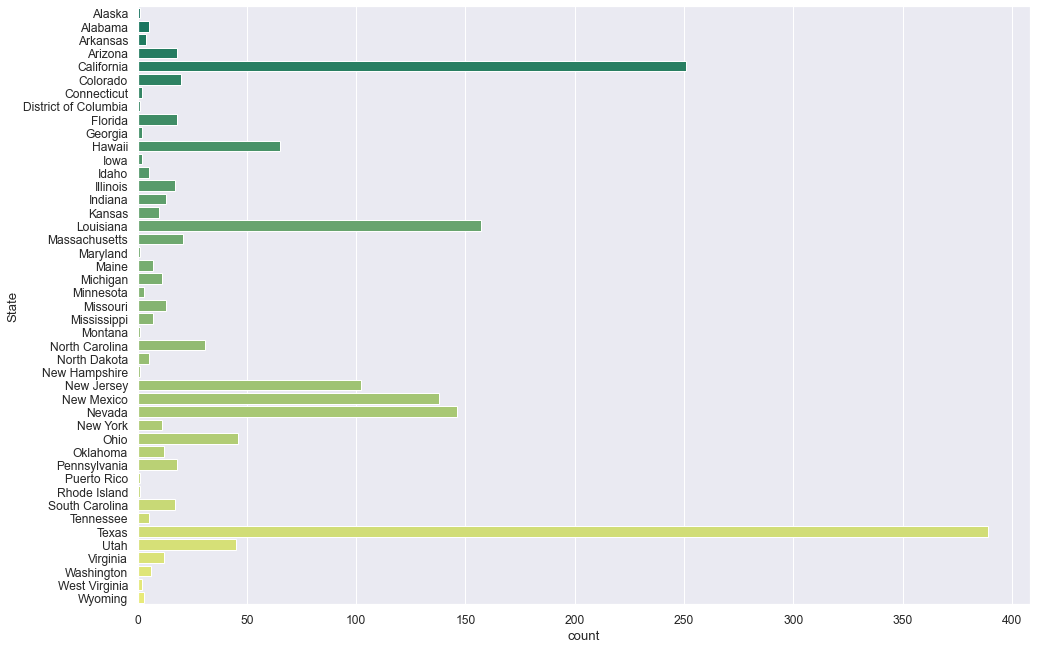

In [22]:
df_USA=df[df['Country']=='USA']
sns.countplot(y='State',palette='summer',data=df_USA)

In [23]:
sns.set(rc = {'figure.figsize':(30,9)},font_scale=1.4)

<AxesSubplot:xlabel='State', ylabel='count'>

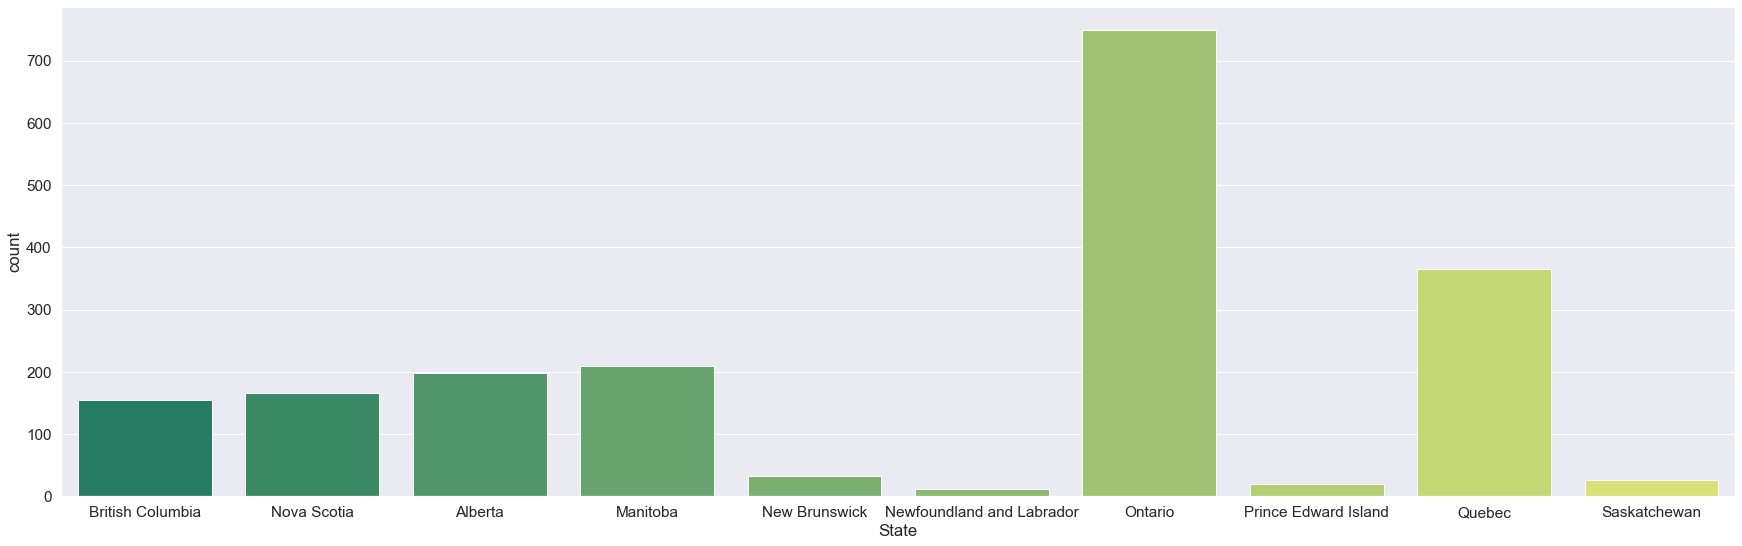

In [24]:
df_Canada=df[df['Country']=='Canada']
sns.countplot(x='State',palette='summer',data=df_Canada)

<AxesSubplot:xlabel='State', ylabel='count'>

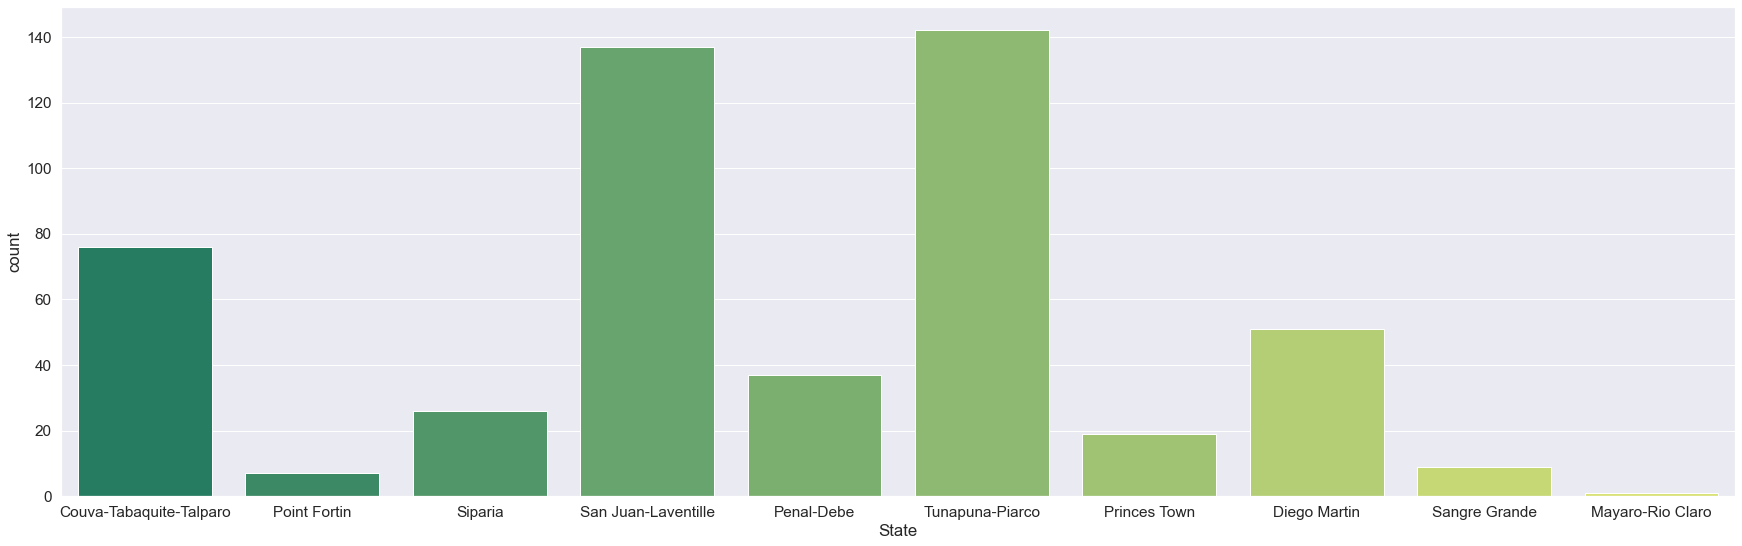

In [25]:
df_TT=df[df['Country']=='Trinidad and Tobago']
sns.countplot(x='State',palette='summer',data=df_TT)

In [26]:
street_map = gpd.read_file('C:/Users/david/Downloads/archive (1)/shapefile_usa/USA_States.shp')

<AxesSubplot:>

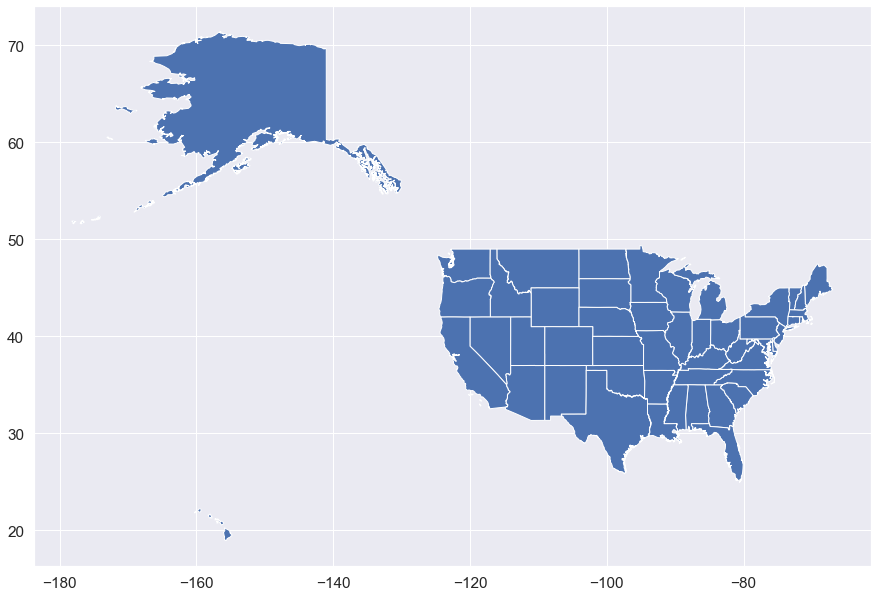

In [27]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [28]:
geometry = [Point(xy) for xy in zip(df_USA['Longitude'], df_USA['Latitude'])]

In [29]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df_USA, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

C:\Users\david\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,State,Country,SeverityScore,IncidentsTotal,UpdateDate,Version,geometry
2920,bdvknqe,"POLYGON((-149.838409423828 61.2075805664062, -...",61.208,-149.838,61.209,-149.837,POINT(-149.83835 61.20789),61.208,-149.838,Alaska,USA,0.279,10,02-10-2020,5.1,POINT (-149.83800 61.20800)
2921,dj3qexj,"POLYGON((-88.0815124511719 30.7122802734375, -...",30.712,-88.082,30.714,-88.080,POINT(-88.08146 30.7132),30.713,-88.081,Alabama,USA,0.151,3,02-10-2020,5.1,POINT (-88.08100 30.71300)
2922,dj9g8fh,"POLYGON((-87.5006103515625 31.563720703125, -8...",31.564,-87.501,31.565,-87.499,POINT(-87.49964 31.5646),31.565,-87.500,Alabama,USA,0.065,7,02-10-2020,5.1,POINT (-87.50000 31.56500)
2923,dj9tzxy,"POLYGON((-87.5527954101562 31.9908142089844, -...",31.991,-87.553,31.992,-87.551,POINT(-87.55262 31.9909),31.991,-87.553,Alabama,USA,0.643,33,02-10-2020,5.1,POINT (-87.55300 31.99100)
2924,dj9tzxv,"POLYGON((-87.5541687011719 31.9908142089844, -...",31.991,-87.554,31.992,-87.553,POINT(-87.55287 31.99091),31.991,-87.553,Alabama,USA,0.312,9,02-10-2020,5.1,POINT (-87.55300 31.99100)


In [30]:
max(df['SeverityScore'])

7.234

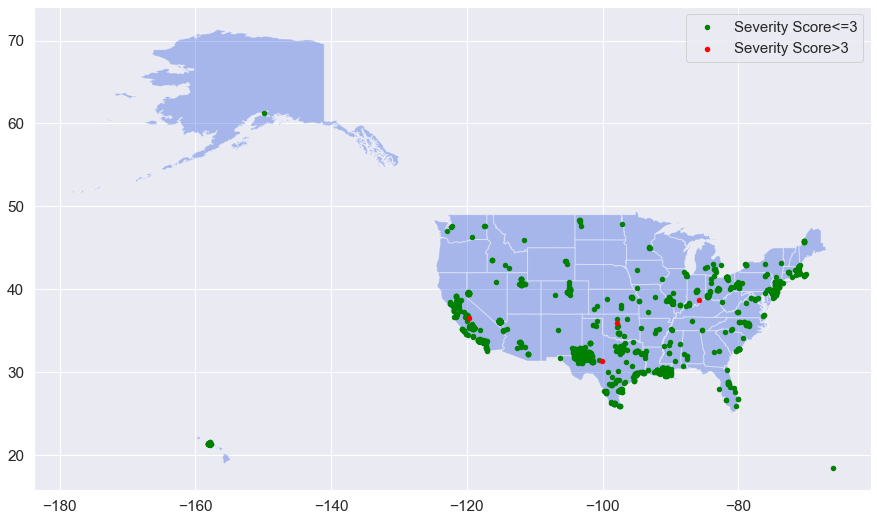

In [31]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='royalblue')
geo_df[geo_df['SeverityScore'] <=3].plot(ax=ax, 
                                       markersize=20, 
                                       color='green', 
                                       marker='o', 
                                       label='Severity Score<=3')
geo_df[geo_df['SeverityScore'] >3].plot(ax=ax, 
                                       markersize=20, 
                                       color='red', 
                                       marker='o', 
                                       label='Severity Score>3')
plt.legend(prop={'size':15})

In [32]:
street_map = gpd.read_file('C:/Users/david/Downloads/archive (1)/shapefile_mexico/Mexico_States.shp')

<AxesSubplot:>

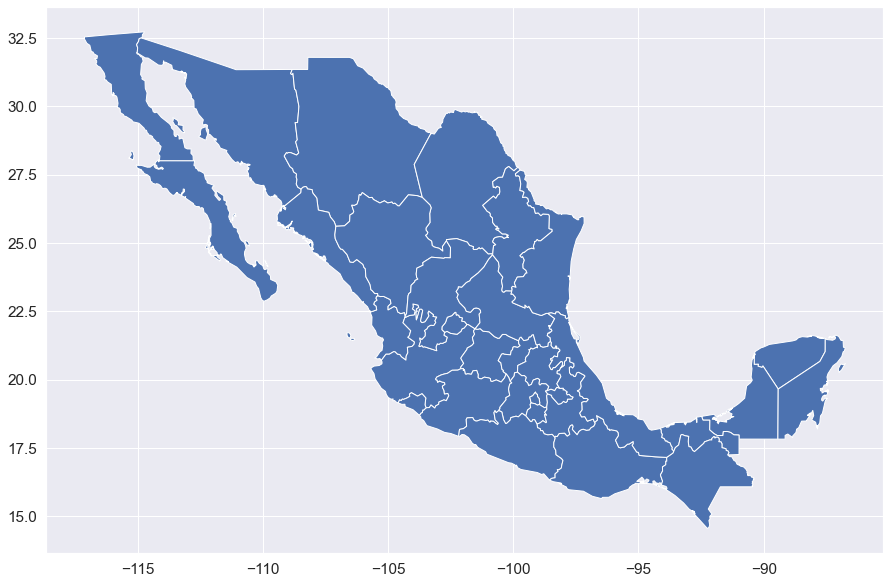

In [33]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax)

In [34]:
geometry = [Point(xy) for xy in zip(df_Mexico['Longitude'], df_Mexico['Latitude'])]

In [35]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df_Mexico, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

C:\Users\david\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Geohash,GeohashBounds,Latitude_SW,Longitude_SW,Latitude_NE,Longitude_NE,Location,Latitude,Longitude,State,Country,SeverityScore,IncidentsTotal,UpdateDate,Version,geometry
4568,9eyurhx,"POLYGON((-102.690582275391 21.8655395507813, -...",21.866,-102.691,21.867,-102.689,POINT(-102.69014 21.86653),21.867,-102.690,Aguascalientes,Mexico,0.127,3,02-10-2020,5.1,POINT (-102.69000 21.86700)
4569,9ezhze3,"POLYGON((-102.325286865234 21.9465637207031, -...",21.947,-102.325,21.948,-102.324,POINT(-102.325 21.94721),21.947,-102.325,Aguascalientes,Mexico,0.033,4,02-10-2020,5.1,POINT (-102.32500 21.94700)
4570,9ezkb5v,"POLYGON((-102.297821044922 21.9493103027344, -...",21.949,-102.298,21.951,-102.296,POINT(-102.29657 21.94974),21.950,-102.297,Aguascalientes,Mexico,0.041,5,02-10-2020,5.1,POINT (-102.29700 21.95000)
4571,9ezhzhz,"POLYGON((-102.339019775391 21.9548034667969, -...",21.955,-102.339,21.956,-102.338,POINT(-102.33793 21.95558),21.956,-102.338,Aguascalientes,Mexico,0.028,10,02-10-2020,5.1,POINT (-102.33800 21.95600)
4572,9ezhzhx,"POLYGON((-102.339019775391 21.9534301757812, -...",21.953,-102.339,21.955,-102.338,POINT(-102.33839 21.95391),21.954,-102.338,Aguascalientes,Mexico,0.025,4,02-10-2020,5.1,POINT (-102.33800 21.95400)


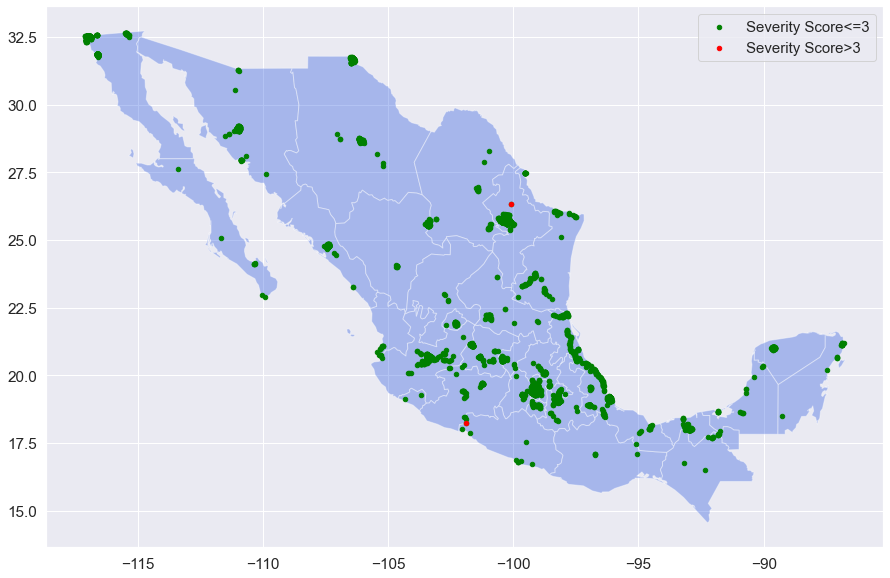

In [36]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color='royalblue')
geo_df[geo_df['SeverityScore'] <=3].plot(ax=ax, 
                                       markersize=20, 
                                       color='green', 
                                       marker='o', 
                                       label='Severity Score<=3')
geo_df[geo_df['SeverityScore'] >3].plot(ax=ax, 
                                       markersize=20, 
                                       color='red', 
                                       marker='o', 
                                       label='Severity Score>3')
plt.legend(prop={'size':15})